In [99]:
import random
import pandas as pd
import numpy as np
#!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Function to create embeddings

In [100]:
def getTokens(input):
  tokensBySlash = str(input.encode('utf-8')).split('/')	#get tokens after splitting by slash
  allTokens = []
  for i in tokensBySlash:
    tokens = str(i).split('-')	#get tokens after splitting by dash
    tokensByDot = []
    for j in range(0,len(tokens)):
      tempTokens = str(tokens[j]).split('.')	#get tokens after splitting by dot
      tokensByDot = tokensByDot + tempTokens
    allTokens = allTokens + tokens + tokensByDot
  allTokens = list(set(allTokens))	#remove redundant tokens
  if 'com' in allTokens:
    allTokens.remove('com')	#removing .com since it occurs a lot of times and it should not be included in our features
  return allTokens

Create embedding from data

In [101]:
allurls = 'shortester_data.txt'	#path to our all urls file
allurlscsv = pd.read_csv(allurls)	#reading file
allurlsdata = pd.DataFrame(allurlscsv)	#converting to a dataframe

allurlsdata = np.array(allurlsdata)	#converting it into an array
random.shuffle(allurlsdata)	#shuffling
print(allurlsdata)

[['zkic.com' 'bad']
 ['nowina.info' 'bad']
 ['zkic.com' 'bad']
 ...
 ['en.wikipedia.org/wiki/Highway_17_(Ontario)' 'good']
 ['zoocrewconstruction.co/wp-content/plugins/quick-setup/mailupdate/others/ii.php?rand=13inboxlightaspxn.1774256418&amp;fid.4.1252899642&amp;fid=1&amp;fav.1&amp;rand.13inboxlight.aspxn.1774256418&amp;fid.1252899642&amp;fid.1&amp;fav.1&amp;username=&amp;username1=&amp;domain=&amp;.rand=13inboxlig'
  'bad']
 ['louisville.citysearch.com/profile/34104544/louisville_ky/bonaventure_place.html'
  'good']]


In [102]:
y = [d[1] for d in allurlsdata]	#all labels
corpus = [d[0] for d in allurlsdata]	#all urls corresponding to a label (either good or bad)
vectorizer = TfidfVectorizer(tokenizer=getTokens)	#get a vector for each url but use our customized tokenizer
X = vectorizer.fit_transform(corpus) #get the X vector

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

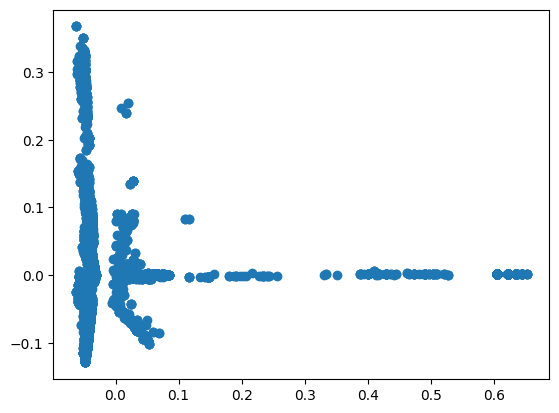

In [103]:
# I can't figure out how to do color
vectors = vector_array.toarray()

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.show

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)	#split into training and testing set 80/20 ratio

lgs = LogisticRegression()	#using logistic regression
lgs.fit(X_train, y_train)
print(lgs.score(X_test, y_test)) #pring the score. It comes out to be 98%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)	#split into training and testing set 80/20 ratio

lgs = LogisticRegression()	#using logistic regression
lgs.fit(X_train, y_train)
print(lgs.score(X_test, y_test)) #pring the score. It comes out to be 98%

0.9671848013816926
0.9671848013816926


In [105]:
X_predict = ['wikipedia.com','google.com/search=faizanahad','pakistanifacebookforever.com/getpassword.php/','www.radsport-voggel.de/wp-admin/includes/log.exe','ahrenhei.without-transfer.ru/nethost.exe','www.itidea.it/centroesteticosothys/img/_notes/gum.exe']
X_predict = vectorizer.transform(X_predict)
y_Predict = lgs.predict(X_predict)
print(y_Predict) #printing predicted values

X_predict = ['wikipedia.com','google.com/search=faizanahad','pakistanifacebookforever.com/getpassword.php/','www.radsport-voggel.de/wp-admin/includes/log.exe','ahrenhei.without-transfer.ru/nethost.exe','www.itidea.it/centroesteticosothys/img/_notes/gum.exe']
X_predict = vectorizer.transform(X_predict)
y_Predict = lgs.predict(X_predict)
print(y_Predict) #printing predicted values

['bad' 'bad' 'good' 'bad' 'bad' 'bad']
['bad' 'bad' 'good' 'bad' 'bad' 'bad']


In [106]:
# knn = KNeighborsClassifier(n_neighbors=3)

# value_mapping = {0:'bad', 1:'good'}

# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)

# y_pred_str = np.where(y_pred == 0, value_mapping[0], value_mapping[1])

# y_test_str = np.where(y_test == 0, value_mapping[0], value_mapping[1])

# y_test_str = pd.DataFrame(y_test_str)
# y_true_str = pd.DataFrame(y_true_str)

# y_true_str = X[:, -1]

# accuracy = accuracy_score(y_test_str, y_pred_str)
# precision = precision_score(y_test_str, y_pred_str)
# recall = recall_score(y_test_str, y_pred_str)
# f1 = f1_score(y_test_str, y_pred_str)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 score:", f1)



# plt.scatter(y_test_str, y_pred_str)
# plt.xlabel("True values")
# plt.ylabel("Predicted values")
# plt.show()

# Assuming X_train, X_test, y_train, y_test are defined
knn = KNeighborsClassifier(n_neighbors=3)

value_mapping = {'bad': 0, 'good' : 1}

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_pred_str = np.array([value_mapping[y] for y in y_pred])
y_test_str = np.array([value_mapping[y] for y in y_test])

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='good')
recall = recall_score(y_test, y_pred, pos_label='good')
f1 = f1_score(y_test, y_pred, pos_label='good')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Accuracy: 0.9229706390328152
Precision: 0.9722222222222222
Recall: 0.8340425531914893
F1 score: 0.8978469995419147
